# Exploratory Data Analysis Honors Lab
## Abigail Blas

## Imports

In [1]:
!pip install kagglehub
!pip install -q pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import os
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

## Dataframe

The dataframe I'm going to be using contains information about penguins. It contains 334 samples with 7 features each. These features include `species`, `island`, `sex`, `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, and `body_mass_g`. A culmen is defined as 'the upper ridge of a bird's bill.'

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parulpandey/palmer-archipelago-antarctica-penguin-data")
dataset_dir = '/home/jupyterlab/.cache/kagglehub/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data/versions/1'
files = os.listdir(dataset_dir)

print("Path to dataset files:", files)
 

Path to dataset files: ['penguins_size.csv', 'penguins_lter.csv']


In [5]:
df = pd.read_csv(path + "/penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
df_copy = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Initial plan for data

I would like to see what the strongest predictors of species are. I'd also like to look at the difference among the islands and sexes and what trends these may have.

# Data cleaning and feature engineering

Initially, I'd like to clean up some of these column names to make the dataframe nicer to work with. I'd also like to inspect the null values and decide what path I would like to take with either replacing them or deleting their row entirely. After doing this I'm going to ensure that the object columns in the data only contain expected values.

In [7]:
df['body_mass'] = df['body_mass_g']
df.drop('body_mass_g', axis=1, inplace=True)
df['flipper_length'] = df['flipper_length_mm']
df.drop('flipper_length_mm', axis=1, inplace=True)
df['culmen_depth'] = df['culmen_depth_mm']
df.drop('culmen_depth_mm', axis=1, inplace=True)
df['culmen_length'] = df['culmen_length_mm']
df.drop('culmen_length_mm', axis=1, inplace=True)
df

,species,island,sex,body_mass,flipper_length,culmen_depth,culmen_length
0,Adelie,Torgersen,MALE,3750.0,181.0,18.7,39.1
1,Adelie,Torgersen,FEMALE,3800.0,186.0,17.4,39.5
2,Adelie,Torgersen,FEMALE,3250.0,195.0,18.0,40.3
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,FEMALE,3450.0,193.0,19.3,36.7
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,FEMALE,4850.0,215.0,14.3,46.8
341,Gentoo,Biscoe,MALE,5750.0,222.0,15.7,50.4
342,Gentoo,Biscoe,FEMALE,5200.0,212.0,14.8,45.2


In [8]:
print(df[df.isna().any(axis=1)])

    species     island  sex  body_mass  flipper_length  culmen_depth  \
3    Adelie  Torgersen  NaN        NaN             NaN           NaN   
8    Adelie  Torgersen  NaN     3475.0           193.0          18.1   
9    Adelie  Torgersen  NaN     4250.0           190.0          20.2   
10   Adelie  Torgersen  NaN     3300.0           186.0          17.1   
11   Adelie  Torgersen  NaN     3700.0           180.0          17.3   
47   Adelie      Dream  NaN     2975.0           179.0          18.9   
246  Gentoo     Biscoe  NaN     4100.0           216.0          14.3   
286  Gentoo     Biscoe  NaN     4650.0           214.0          14.4   
324  Gentoo     Biscoe  NaN     4725.0           216.0          13.8   
339  Gentoo     Biscoe  NaN        NaN             NaN           NaN   

     culmen_length  
3              NaN  
8             34.1  
9             42.0  
10            37.8  
11            37.8  
47            37.5  
246           44.5  
286           46.2  
324           47.3

As shown above, this data has some columns with missing values. The `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, and `body_mass_g` values are all missing from rows 3 and 339, therefore I am going to remove these samples from the set. I'm also going to remove the samples that have null values in `sex` since this could be an important factor that shouldn't be guessed.

In [9]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         334 non-null    object 
 1   island          334 non-null    object 
 2   sex             334 non-null    object 
 3   body_mass       334 non-null    float64
 4   flipper_length  334 non-null    float64
 5   culmen_depth    334 non-null    float64
 6   culmen_length   334 non-null    float64
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


Checking the data to make sure there are only expected values in the object columns.

In [10]:
df['sex'].unique().tolist()

['MALE', 'FEMALE', '.']

There seems to be an sample that has `'.'` entered in the `sex` column. I'm going to remove this sample from my working dataframe for the same reasons as I mentioned before.

In [11]:
print(df[df['sex'] == '.'])

    species  island sex  body_mass  flipper_length  culmen_depth  \
336  Gentoo  Biscoe   .     4875.0           217.0          15.7   

     culmen_length  
336           44.5  


In [12]:
df = df.drop([336])
df['sex'].unique().tolist()

['MALE', 'FEMALE']

In [13]:
df['island'].unique().tolist()

['Torgersen', 'Biscoe', 'Dream']

In [14]:
df['species'].unique().tolist()

['Adelie', 'Chinstrap', 'Gentoo']

All other entries have values that are to be expected.

## Data Statistics
Finding and displaying the statistics for the data.

In [15]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [16]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [17]:
df['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [18]:
stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
stats_df

,body_mass,flipper_length,culmen_depth,culmen_length
count,333.000000,333.000000,333.000000,333.000000
mean,4207.057057,200.966967,17.164865,43.992793
std,805.215802,14.015765,1.969235,5.468668
min,2700.000000,172.000000,13.100000,32.100000
25%,3550.000000,190.000000,15.600000,39.500000
50%,4050.000000,197.000000,17.300000,44.500000
75%,4775.000000,213.000000,18.700000,48.600000
max,6300.000000,231.000000,21.500000,59.600000
range,3600.000000,59.000000,8.400000,27.500000


In [19]:
df.groupby('species').mean()

,body_mass,flipper_length,culmen_depth,culmen_length
species,,,,
Adelie,3706.164384,190.102740,18.347260,38.823973
Chinstrap,3733.088235,195.823529,18.420588,48.833824
Gentoo,5092.436975,217.235294,14.996639,47.568067


In [20]:
df.groupby('species').median()

,body_mass,flipper_length,culmen_depth,culmen_length
species,,,,
Adelie,3700.0,190.0,18.40,38.85
Chinstrap,3700.0,196.0,18.45,49.55
Gentoo,5050.0,216.0,15.00,47.40


In [21]:
df.groupby('sex').mean()

,body_mass,flipper_length,culmen_depth,culmen_length
sex,,,,
FEMALE,3862.272727,197.363636,16.425455,42.096970
MALE,4545.684524,204.505952,17.891071,45.854762


From here, I'd like to break down the data by `species` and `sex` to get a better look at the differences among them.

In [22]:
adelie_df = df[df['species'] == 'Adelie']
chinstrap_df = df[df['species'] == 'Chinstrap']
gentoo_df = df[df['species'] == 'Gentoo']

In [23]:
adelie_df.groupby('sex').mean()

,body_mass,flipper_length,culmen_depth,culmen_length
sex,,,,
FEMALE,3368.835616,187.794521,17.621918,37.257534
MALE,4043.493151,192.410959,19.072603,40.390411


In [24]:
chinstrap_df.groupby('sex').mean()

,body_mass,flipper_length,culmen_depth,culmen_length
sex,,,,
FEMALE,3527.205882,191.735294,17.588235,46.573529
MALE,3938.970588,199.911765,19.252941,51.094118


In [25]:
gentoo_df.groupby('sex').mean()

,body_mass,flipper_length,culmen_depth,culmen_length
sex,,,,
FEMALE,4679.741379,212.706897,14.237931,45.563793
MALE,5484.836066,221.540984,15.718033,49.473770


## Comparing the features across `species`
This information can be easily cross-examined using boxplots and pairplots.

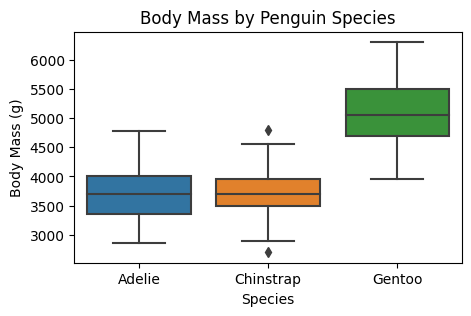

In [26]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='species', y='body_mass')
plt.title('Body Mass by Penguin Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

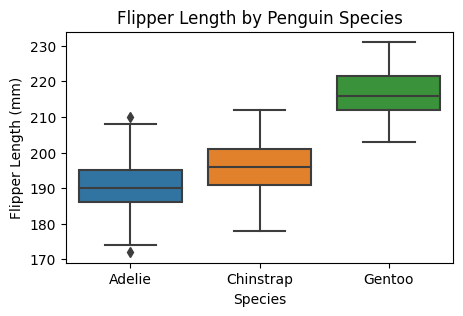

In [27]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='species', y='flipper_length')
plt.title('Flipper Length by Penguin Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.show()

This difference seems extreme, so I'd like to look into it more.

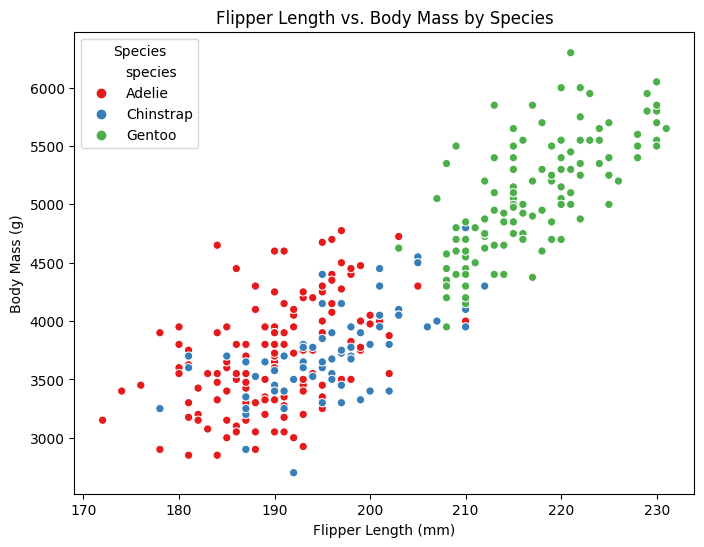

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='flipper_length', y='body_mass', hue='species', palette='Set1')

plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Flipper Length vs. Body Mass by Species')

plt.legend(title='Species')

plt.show()

`body_mass` vs `flipper_length` is a good predictor for Gentoo penguins, but Adelie and Chinstrap are hard to distinguish. Another finding here is that there is a strong positive correlation between `flipper_length` and `body_mass`.

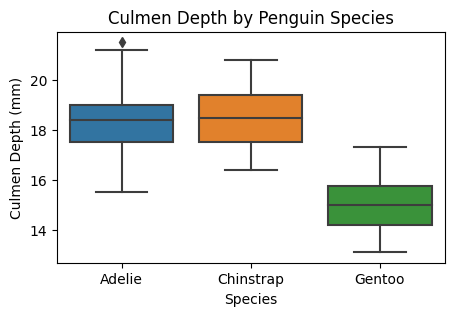

In [29]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='species', y='culmen_depth')
plt.title('Culmen Depth by Penguin Species')
plt.xlabel('Species')
plt.ylabel('Culmen Depth (mm)')
plt.show()

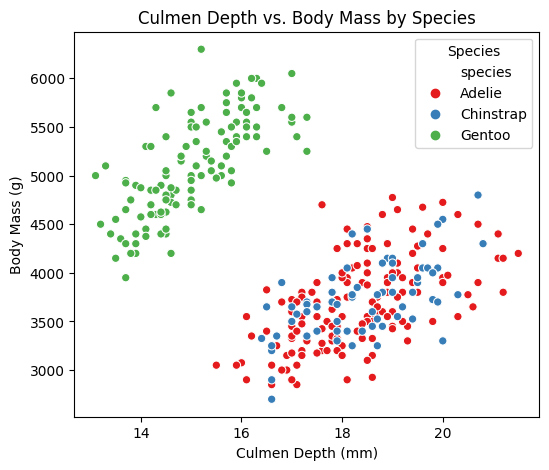

In [30]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='culmen_depth', y='body_mass', hue='species', palette='Set1')

plt.xlabel('Culmen Depth (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Culmen Depth vs. Body Mass by Species')

plt.legend(title='Species')

plt.show()

The separation between the Gentoo samples and the rest of the data is extremely clear using `culmen_depth` vs. `body_mass`. This is an even stronger distinguisher of the Gentoo penguins than what we saw before with `flipper_length` and `body_mass`.

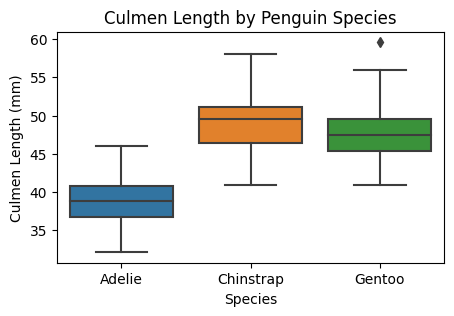

In [31]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='species', y='culmen_length')
plt.title('Culmen Length by Penguin Species')
plt.xlabel('Species')
plt.ylabel('Culmen Length (mm)')
plt.show()

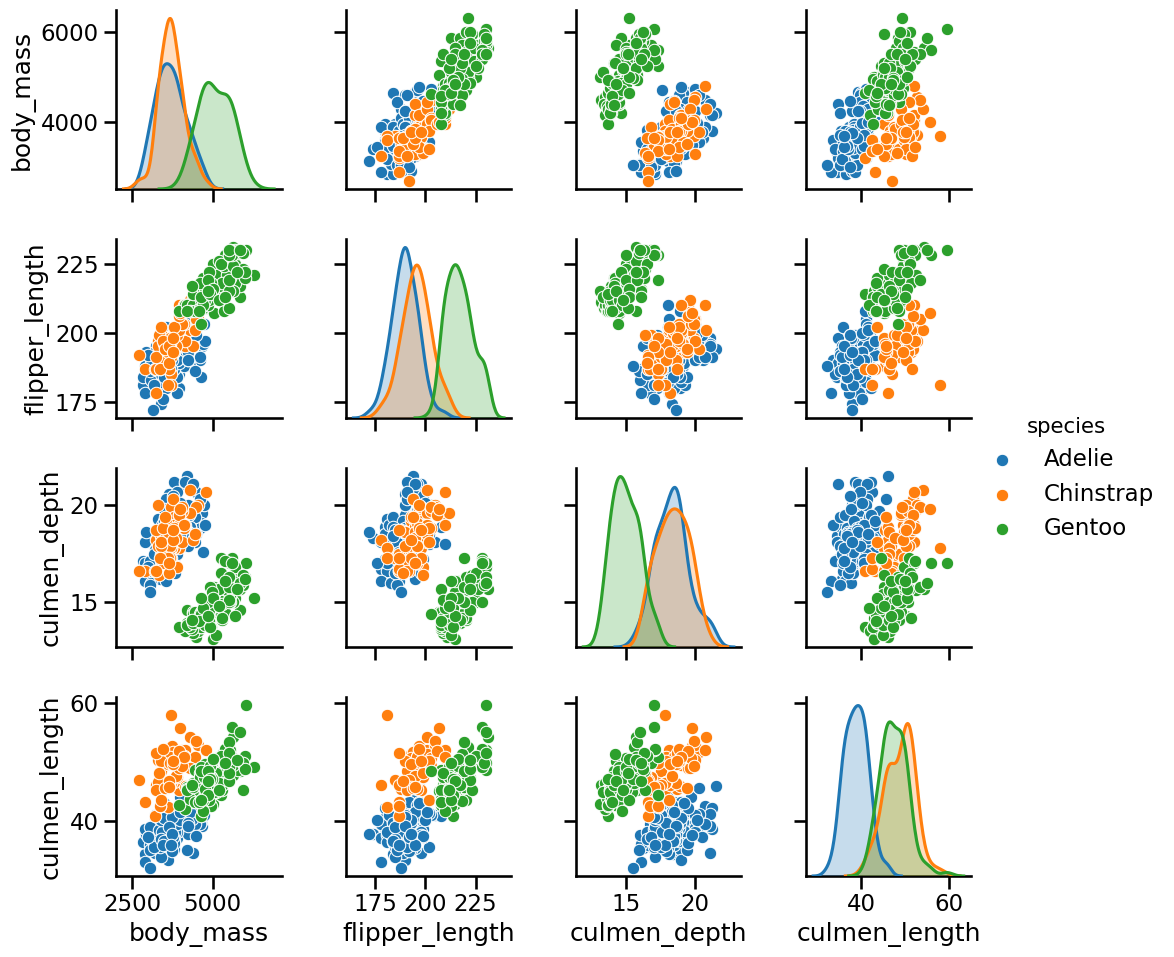

In [32]:
sns.set_context('talk')
sns.pairplot(df, hue='species');

As shown by the graphs generated, it seems as though the `species` Gentoo is the most easily distinguishable from the rest. Maybe there are important trends amongst the `sex` and `island` columns that should be inspected as well. Another strong trend is occuring in the `culmen_length` by `culmen_depth` scatterplots.

## Comparing the features across `sex`

In [33]:
male_df = df[df['sex'] == 'MALE']
female_df = df[df['sex'] == 'FEMALE']

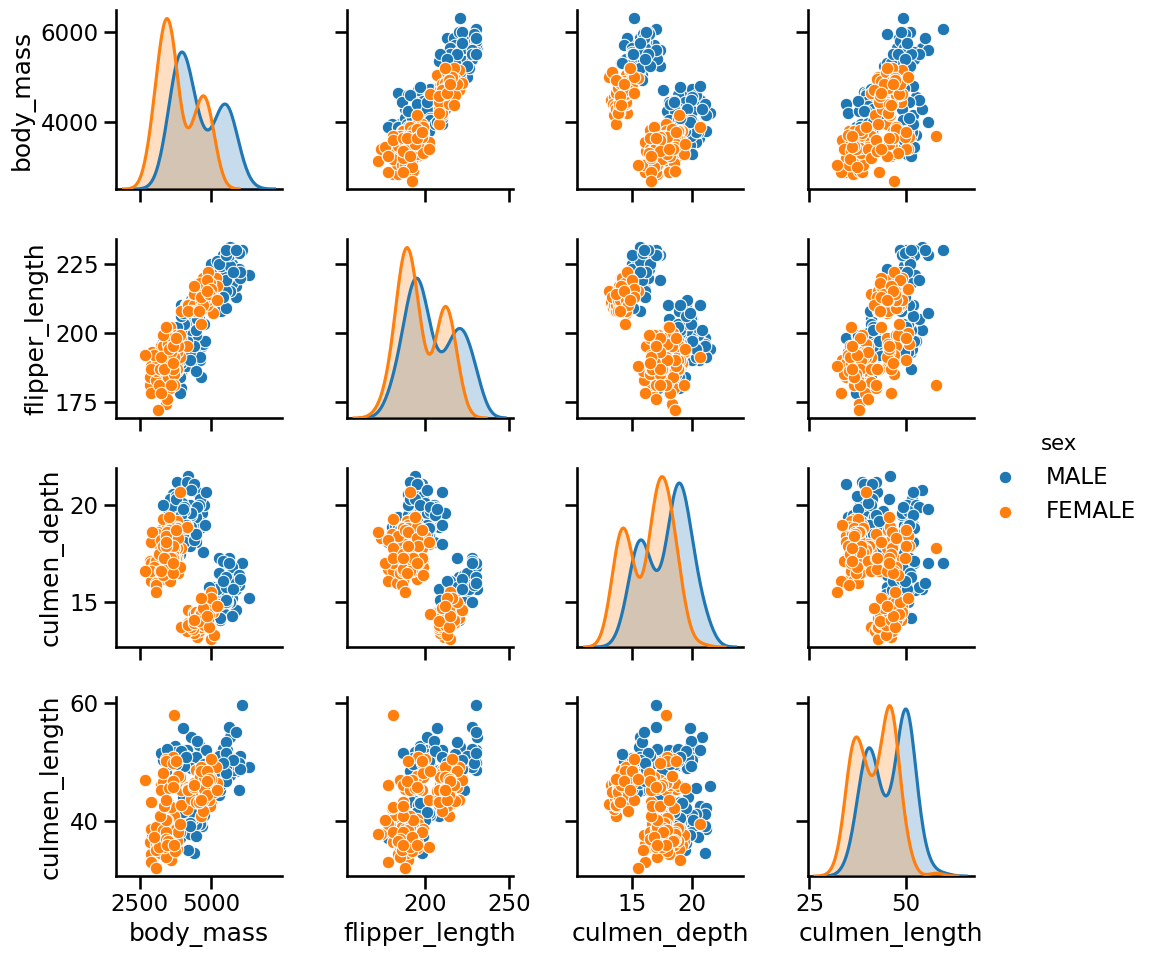

In [34]:
sns.set_context('talk')
sns.pairplot(df, hue='sex');

It can be seen that the same patterns occur for the male and female penguins. The biggest difference is that the female data is slightly shifted to the right of the male.

## Comparing the features across `island`

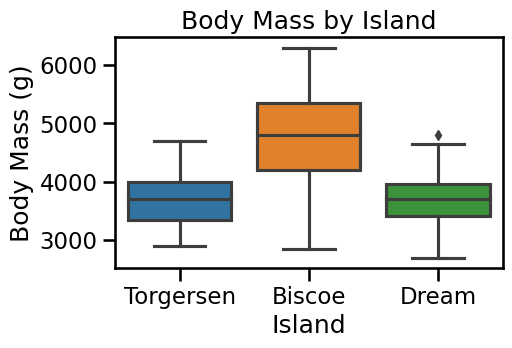

In [35]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='island', y='body_mass')
plt.title('Body Mass by Island')
plt.xlabel('Island')
plt.ylabel('Body Mass (g)')
plt.show()

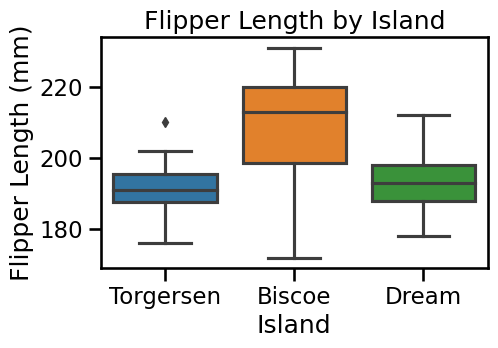

In [36]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='island', y='flipper_length')
plt.title('Flipper Length by Island')
plt.xlabel('Island')
plt.ylabel('Flipper Length (mm)')
plt.show()

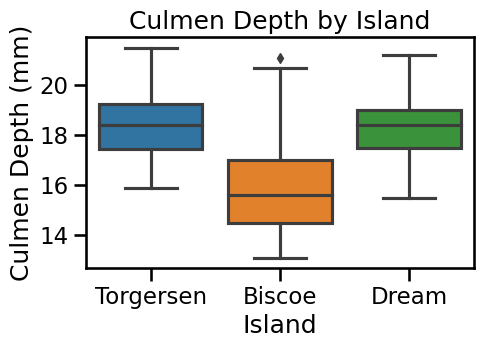

In [37]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='island', y='culmen_depth')
plt.title('Culmen Depth by Island')
plt.xlabel('Island')
plt.ylabel('Culmen Depth (mm)')
plt.show()

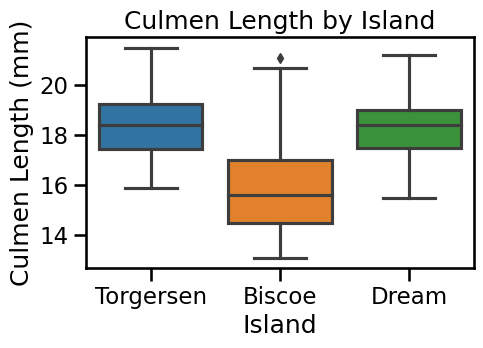

In [38]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='island', y='culmen_depth')
plt.title('Culmen Length by Island')
plt.xlabel('Island')
plt.ylabel('Culmen Length (mm)')
plt.show()

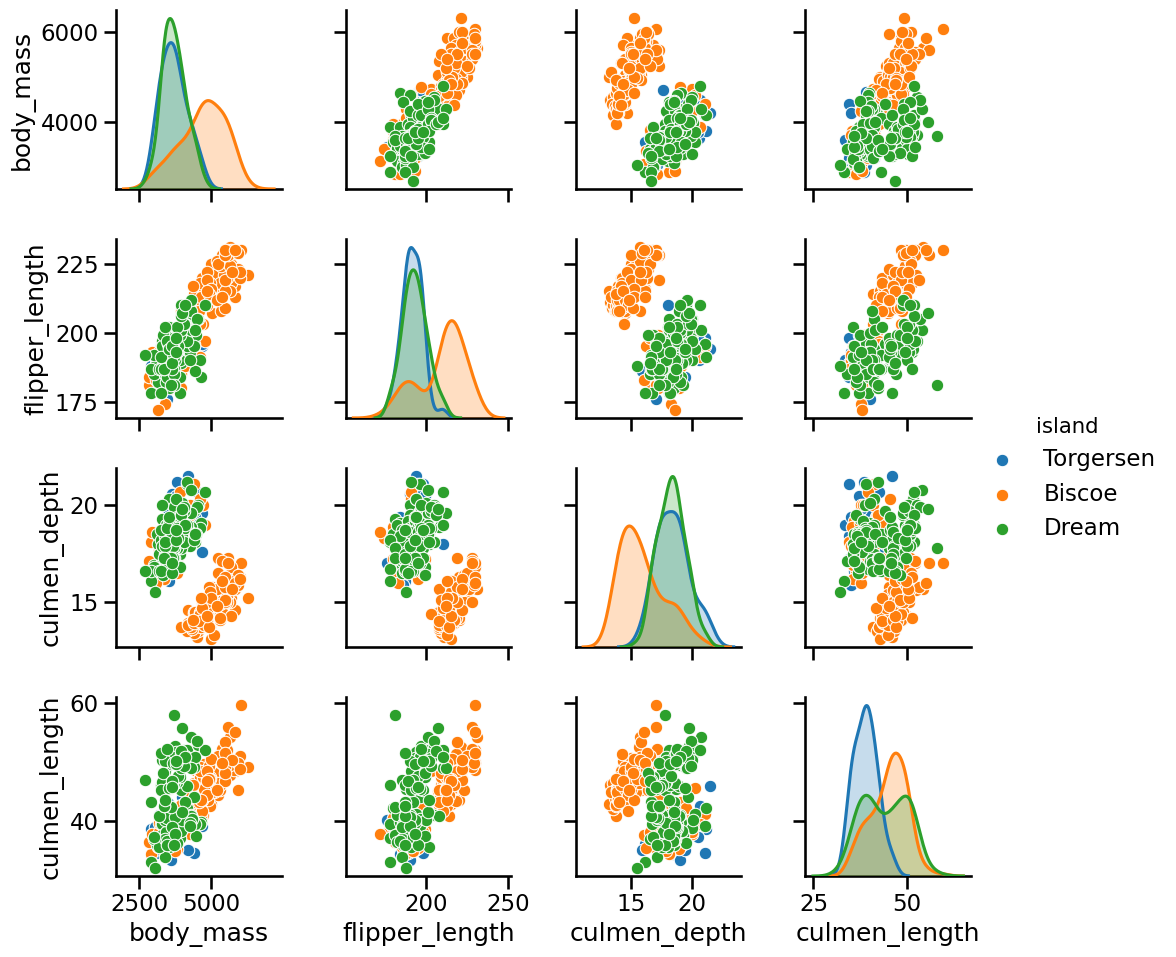

In [39]:
sns.set_context('talk')
sns.pairplot(df, hue='island');

It seems as though the `island` Biscoe is most easily distinguished from the rest. Could there be an underlying reason for this?

In [40]:
torgersen_df = df[df['island'] == 'Torgersen']
biscoe_df = df[df['island'] == 'Biscoe']
dream_df = df[df['island'] == 'Dream']

In [41]:
biscoe_df['species'].value_counts()

Gentoo    119
Adelie     44
Name: species, dtype: int64

This variance could be largely due to the fact that the Biscoe population is mostly made up of Gentoo penguins. This makes the islands and the makeup of species interesting.

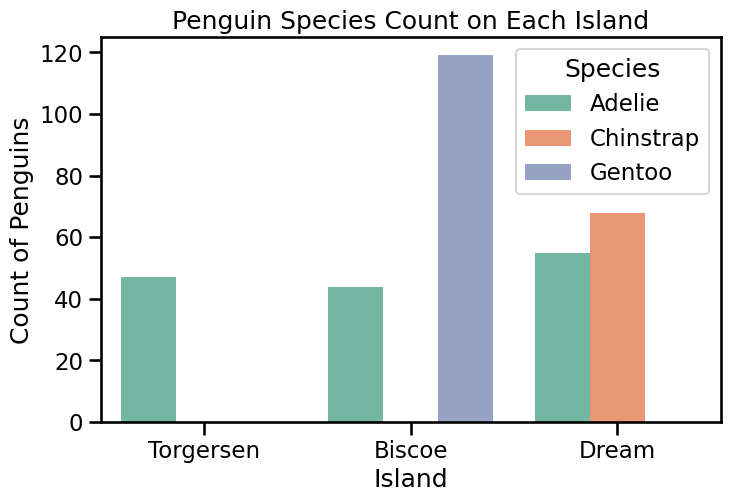

In [42]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x='island', hue='species', palette='Set2')

plt.xlabel('Island')
plt.ylabel('Count of Penguins')
plt.title('Penguin Species Count on Each Island')

plt.legend(title='Species')

plt.show()

* Biscoe is the only island with Gentoo penguins.
* Dream is the only island with Chinstrap penguins.
* Torgersen only has Adelie penguins.
* Adelie penguins appear almost equally amongst the three islands. 

## Examining the culmen length and depth relationship among the species

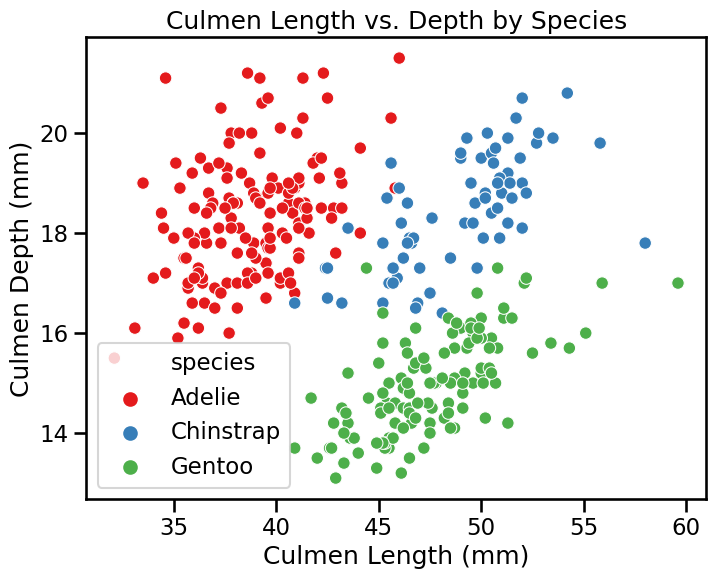

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='culmen_length', y='culmen_depth', hue='species', palette='Set1')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Culmen Length vs. Depth by Species')

plt.legend()

plt.show()

The separation that appears among the three `species` makes it easily categorized by a clustering algorithm. This could mean that `culmen_length` and `culmen_depth` are the strongest predictors of the species.

# Findings and Key Insights

* The Gentoo species is the most unique of the three. It is easily distiguished by its long flippers, heavier body mass, and shorter culmen depth. 
* Islands can be a key predictor of which species the sample is.
* Female penguins have shorter flipper lengths, culmen depths, and culmen lengths and lighter body masses than male penguins in general.
* Plotting culmen length against culmen depth can be a perfect opportunity to categorize samples using only these variables.
* Flipper length and body mass are positively correlated.

# Developing a few hypotheses

## Hypothesis 1
`body_mass` of female penguins is different than male penguins.

## Hypothesis 2
If the `flipper_length` of one sample is larger than the other, then it will most likely have a larger `body_mass` as well.

## Hypothesis 3
`island` is a strong predictor of `species`.


# Hypothesis 1

## Definition
$ 𝐻_{0}:\mu_{1}-\mu_{2} = 0 $ There is no difference between the `body_mass` of male and BMI of female. \
$ 𝐻_{A}:\mu_{1}-\mu_{2} \ne 0 $ There is a difference between the `body_mass` of male and BMI of female.

## Setting Decision Criteria
We will choose 5% significance level. Therefore, our $ \alpha=0.05 $, since this is a two-tailed dataset, we will divide alpha in half giving us $0.025$.

## Evaluating the Results

In [44]:
female = df.loc[df['sex']=='FEMALE']
male = df.loc[df['sex']=='MALE']

In [45]:
f_bm = female.body_mass
m_bm = male.body_mass

<AxesSubplot:xlabel='body_mass'>

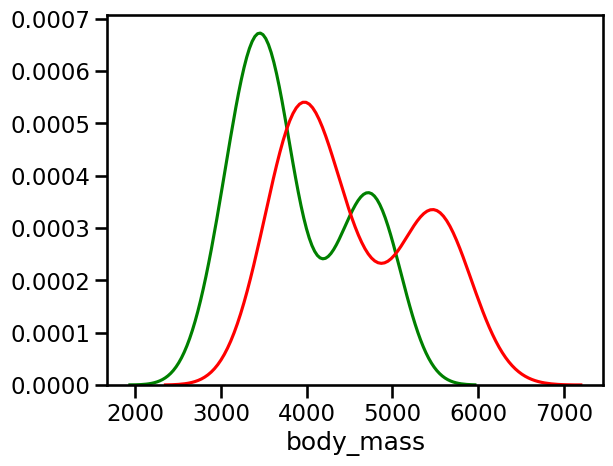

In [46]:
sns.distplot(f_bm,color='green',hist=False)
sns.distplot(m_bm,color='red',hist=False)

In [47]:
female.body_mass.mean()

3862.2727272727275

In [48]:
male.body_mass.mean()

4545.684523809524

In [49]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(m_bm, f_bm)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  8.541720337994516 , p_value1 =  4.897246751596224e-16


## Interpreting the Results

p_value 4.897246751596224e-16 is less than my chosen alpha 0.05. This means we can reject the null hypothesis that there is no difference between the female and male penguin body mass. In other words, the hypothesis that `body_mass` of female penguins is different than male penguins can be accepted.

# The Next Steps for Analyzing this Data

I believe that the next best steps for this data is training a clustering algorithm on the `culmen_length` and `culmen_depth` columns. This seems to be a really great way to catergorize this data and a clustering algorithm seems like it would handle it perfectly.

# Discussion about this Dataset

This dataset was extremely straightforward and simple to work with. I'm thankful to have found a dataset that I consider to be similar to the ones provided. I believe it was very beginner friendly and had everything that I could have needed for a project such as this one. I think the data was of high quality and very useful. If I needed more data, I would request for a more equal amount of penguins from each island. This may have helped me get more information on the difference between the islands and their penguins. 

In [ ]:
!pip 